In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statistics import mode

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
iris_df = pd.read_csv('./Iris.csv')
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
def scatter_iris(df):
    fig,ax = plt.subplots(figsize=(7,10),nrows=2,ncols=1)
    for species in iris_df['Species'].unique():
        ax[0].scatter(x = df[df['Species'] == species]['SepalLengthCm'],
                      y = df[df['Species'] == species]['SepalWidthCm'],
                      label = species,)
        ax[1].scatter(x = df[df['Species'] == species]['PetalLengthCm'],
                      y = df[df['Species'] == species]['PetalWidthCm'],
                      label = species)
    ax[0].legend()
    ax[1].legend()
    ax[0].set(xlabel='Sepal Length',ylabel='Sepal Width')
    ax[1].set(xlabel='Petal Length',ylabel='Petal Width')
    plt.show() 

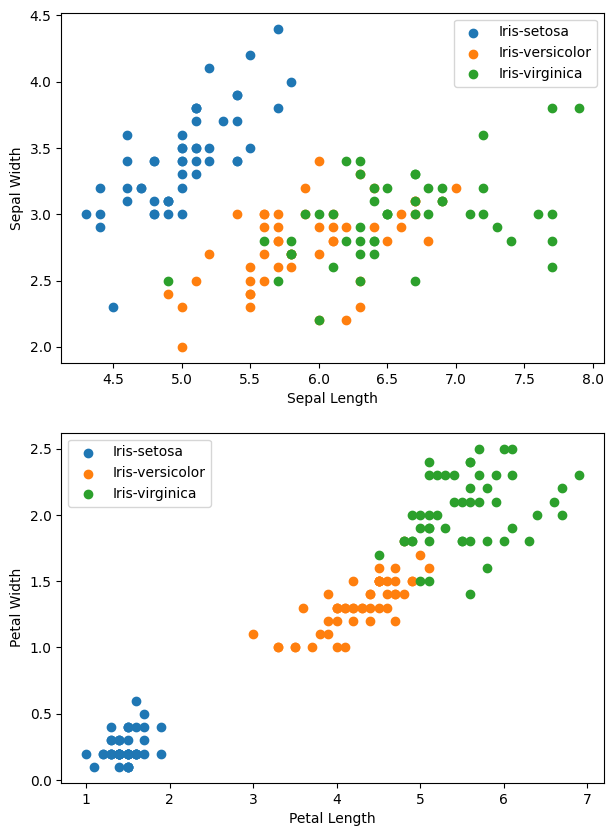

In [5]:
scatter_iris(iris_df)

In [6]:
x = iris_df.drop(['Species','Id'],axis=1)
y = iris_df['Species']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [7]:
def predict_knn(k,x_train,y_train,x_test):
    y_preds = []
    for i in range(len(x_test)):
        distances = []
        a,b,c,d = x_test.iloc[i]
        for j in range(len(x_train)):
            x,y,z,w = x_train.iloc[j]
            distance = ((a-x)**2) + ((b-y)**2) + ((c-z)**2) + ((d-w)**2)
            distance =  distance ** 0.5
            distances.append((distance,y_train.iloc[j]))
        distances.sort(key = lambda x:x[0])
        can_be = []
        for i in range(k):
            can_be.append(distances[i][1])
        y_preds.append(mode(can_be))
    return y_preds
        

In [8]:
y_preds = predict_knn(1,x_train,y_train,x_test)
print(y_preds)

['Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa']


In [9]:
len(y_preds)

30

In [10]:
print(classification_report(y_test,y_preds))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [12]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
model.score(x_test,y_test)

1.0